In [1]:
import speech_recognition as sr
from gtts import gTTS
from IPython.display import Audio

import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display


In [2]:
local_a = 'BotEspec/audios/'
local_i = 'BotEspec/img/'

alt = input('Voce quer ? \n 1 = ler um arquivo. \n 2 = gerar um novo audio. \n ?: ')

In [3]:
if alt == '1':
    try:
        nome = input('Nome do arquivo?: ')
        arquivo = local_a + nome
        data, fs = librosa.load(arquivo +'.wav', sr=44100)

    except FileNotFoundError:
        print('Arquivo nao encontrado.')
        exit()

elif alt == '2':

    nome = input('Nome do arquivo?: ')
    arquivo = local_a + nome

    microfone = sr.Recognizer()

    with sr.Microphone() as source:
        microfone.adjust_for_ambient_noise(source)
        print("Ouvindo... ")
        audio = microfone.listen(source)

    with open(arquivo + '.wav', 'wb') as save:
        save.write(audio.get_wav_data())
        print('Audio Salvado.  :)')

    data, fs = librosa.load(arquivo + '.wav', sr=44100)

else:
    print('erro.  :(')
    exit()

In [4]:
savefig = local_i + nome

Figura 1 Salvada.  :)


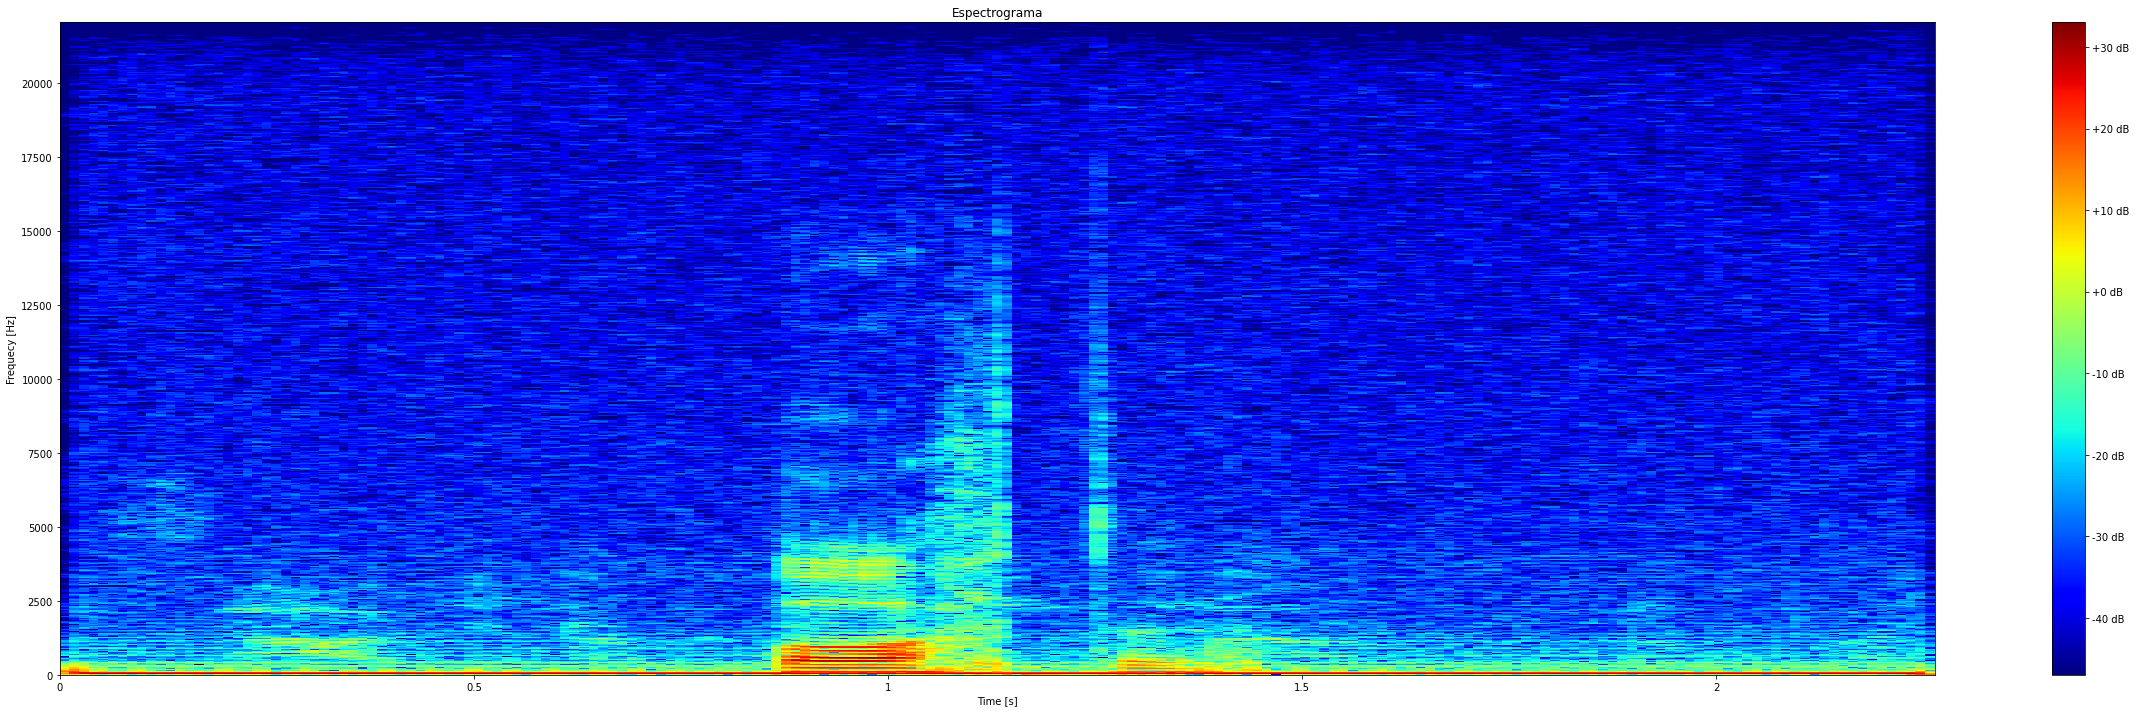

Figura 2 Salvada.  :)


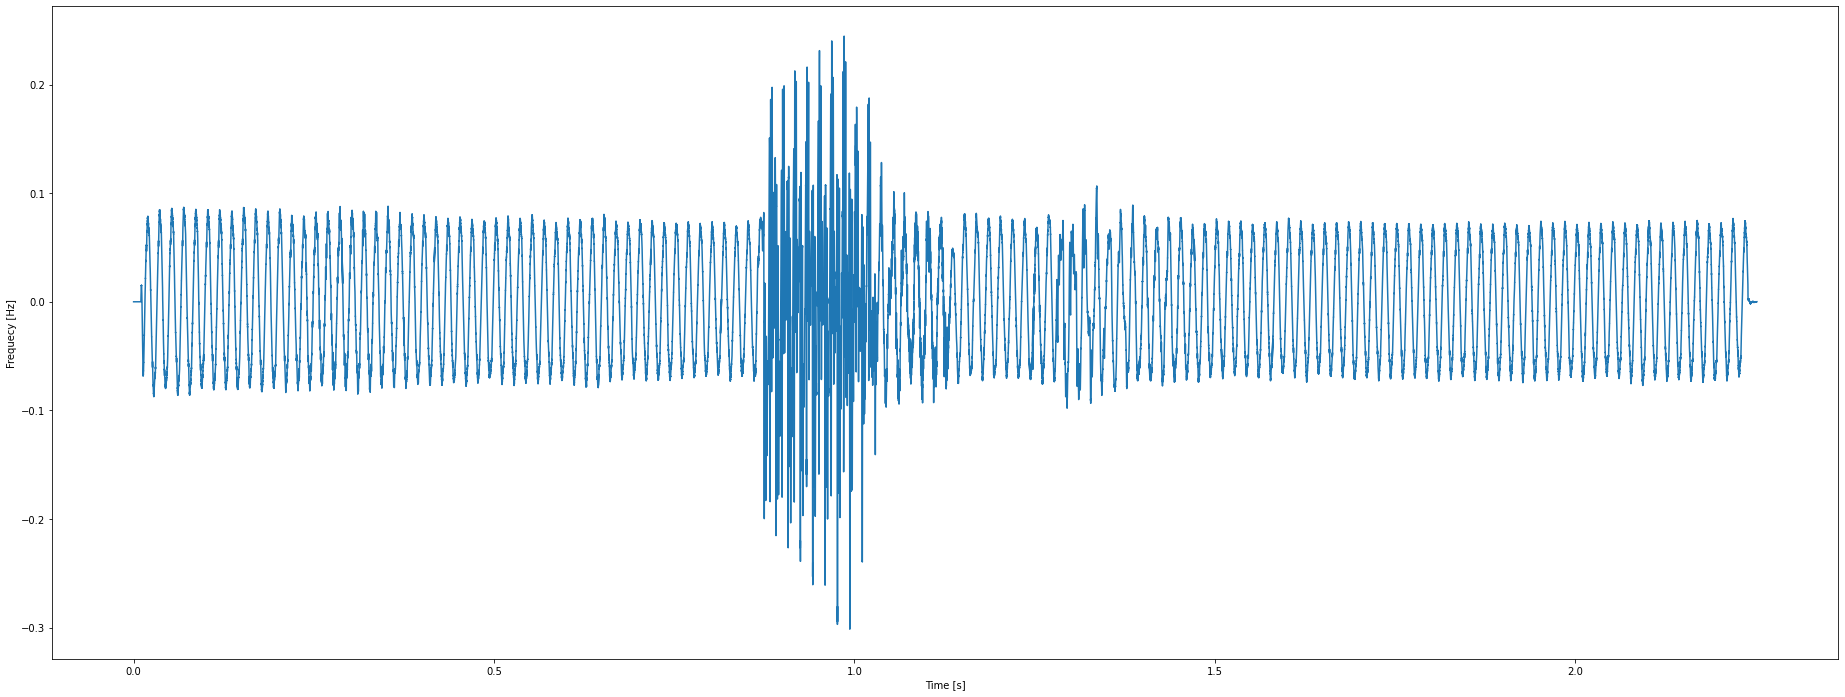

In [5]:
plt.figure(figsize=(42, 12))

fig1 = librosa.amplitude_to_db(np.abs(librosa.stft(data)))
librosa.display.specshow(fig1, x_axis='time', y_axis='linear', sr=fs, cmap='jet')

plt.title('Espectrograma')
plt.xlabel('Time [s]')
plt.ylabel('Frequecy [Hz]')
plt.colorbar(format='%+2.0f dB')
plt.savefig(savefig + '_fig1.jpg')
print('Figura 1 Salvada.  :)')
plt.show()



plt.figure(figsize=(32, 12))

fig2 = np.arange(0, len(data)* 1/fs, 1/fs)

plt.plot(fig2, data)
plt.xlabel('Time [s]')
plt.ylabel('Frequecy [Hz]')
plt.savefig(savefig + '_fig2.jpg')
print('Figura 2 Salvada.  :)')
plt.show()